# Example Electrolyzer Run

This is a simple example that simulates a series of electrolyzer stacks running based on a sinusoidal power signal. The `run_electrolyzer` function accepts either a YAML filepath, or a Dictionary representing a valid model specification. The full structure for an electrolyzer model is defined in the source code, in `modeling_schema.yaml`.

In [39]:
import numpy as np

from electrolyzer import run_electrolyzer
from electrolyzer.inputs.validation import load_modeling_yaml

In [40]:
# Set up matplot objects
import matplotlib.pyplot as plt
%matplotlib inline

SMALL = 10
MEDIUM = 12 
LARGE = 16
plt.rc('font', size=SMALL)
plt.rc('axes', labelsize=MEDIUM)
plt.rc('axes', titlesize=LARGE)
plt.rc('xtick', labelsize=SMALL)
plt.rc('ytick', labelsize=SMALL)
plt.rc('legend', fontsize=SMALL)
plt.rc('figure', titlesize=LARGE)

In [41]:
turbine_rating = 2*20.4 # 6 turbines3.4  # MW

# Create cosine test signal
test_signal_angle = np.linspace(0, 1 * np.pi, 3600 + 10)
base_value = (turbine_rating / 2) + 0.2
variation_value = turbine_rating - base_value
power_test_signal = (base_value + variation_value * np.cos(test_signal_angle)) * 1e6

#power_test_signal = np.ones(len(test_signal_angle)) * 6 * turbine_rating * 5

### Approach 1: YAML File

In [42]:
fname_input_modeling = "./modeling_options.yaml"

In [43]:
elec_sys, result_df = run_electrolyzer(fname_input_modeling, power_test_signal)

`run_electrolyzer` returns a tuple containing the `Supervisor` instance as well as a time-series `pandas.DataFrame`.

In [44]:
type(elec_sys)

electrolyzer.supervisor.Supervisor

In [45]:
result_df.tail()

,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_1_curr_density,stack_2_deg,...,stack_6_cycles,stack_6_uptime,stack_6_kg_rate,stack_6_curr_density,stack_7_deg,stack_7_fatigue,stack_7_cycles,stack_7_uptime,stack_7_kg_rate,stack_7_curr_density
3605,400122.452286,0.0,0.002047,0.000001,8.585545e-08,0.0,3606.0,0.000496,0.506886,0.000001,...,0.0,3601.0,0.000258,0.266578,0.000001,1.051027e-07,0.0,3600.0,0.000258,0.266578
3606,400068.879442,0.0,0.002046,0.000001,8.585545e-08,0.0,3607.0,0.000496,0.506634,0.000001,...,0.0,3602.0,0.000258,0.266578,0.000001,1.051027e-07,0.0,3601.0,0.000258,0.266578
3607,400030.613095,0.0,0.002046,0.000001,8.585545e-08,0.0,3608.0,0.000495,0.506455,0.000001,...,0.0,3603.0,0.000258,0.266578,0.000001,1.051027e-07,0.0,3602.0,0.000258,0.266578
3608,400007.653275,0.0,0.002045,0.000001,8.585545e-08,0.0,3609.0,0.000494,0.506347,0.000001,...,0.0,3604.0,0.000258,0.266578,0.000001,1.051027e-07,0.0,3603.0,0.000258,0.266578
3609,400000.000000,0.0,0.002045,0.000001,8.585545e-08,0.0,3610.0,0.000494,0.506311,0.000001,...,0.0,3605.0,0.000258,0.266578,0.000001,1.051027e-07,0.0,3604.0,0.000258,0.266578


## Approach 2: Dictionary

This is essentially the same process, but the use of a dictionary allows for easier programmatic runs.

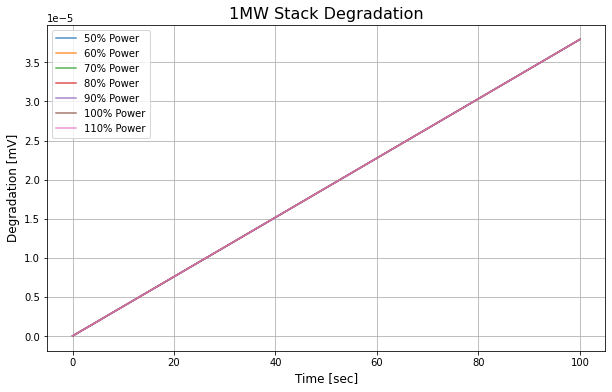

In [46]:
n = np.arange(0.5,1.2,0.1)

modeling_input4 = load_modeling_yaml(fname_input_modeling)

modeling_input4['electrolyzer']['stack']['stack_rating_kW'] = 1000.
modeling_input4['general']['verbose'] = True
modeling_input4["electrolyzer"]["initialize"] = True
modeling_input4["electrolyzer"]["initial_power_kW"] = 100.
# change the number of stacks
modeling_input4["electrolyzer"]["control"]["n_stacks"] = 1

plt.figure(figsize=(10,6))

for i in n: 
    power_test_signal = np.linspace(6e6, 6e6, 101)*i

# Initialized stacks true
    
    elec_sys4, result_df4 = run_electrolyzer(modeling_input4, power_test_signal)

    #result_df4["power_signal"].plot(title="Power Signal", xlabel="Time (s)", ylabel="Power (W)")
    #result_df4["kg_rate"].plot(title="1MW Stack H2 Production", xlabel="Time [sec]", ylabel="H2 rate [kg/s]",label=f'{i*100:.0f}% Power', alpha=0.8)
    
    #deg = result_df4[[col for col in result_df4.columns if "deg" in col]]
    deg = result_df4['stack_1_deg']*1000
    deg.plot(title="1MW Stack Degradation", xlabel="Time [sec]", ylabel="Degradation [mV]", label=f'{i*100:.0f}% Power', alpha=0.8)
plt.legend()
plt.grid()

#stack_rates = result_df4[[col for col in result_df3.columns if "_kg_rate" in col]]
#print(stack_rates.max())

,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_1_curr_density
195,1.470050e+06,0.470050,0.002937,0.000148,0,1.0,183.0,0.002937,3.018984
196,1.477538e+06,0.477538,0.002937,0.000148,0,1.0,184.0,0.002937,3.018984
197,1.485025e+06,0.485025,0.002937,0.000148,0,1.0,185.0,0.002937,3.018984
198,1.492513e+06,0.492513,0.002937,0.000148,0,1.0,186.0,0.002937,3.018984
199,1.500000e+06,0.500000,0.002937,0.000148,0,1.0,187.0,0.002937,3.018984


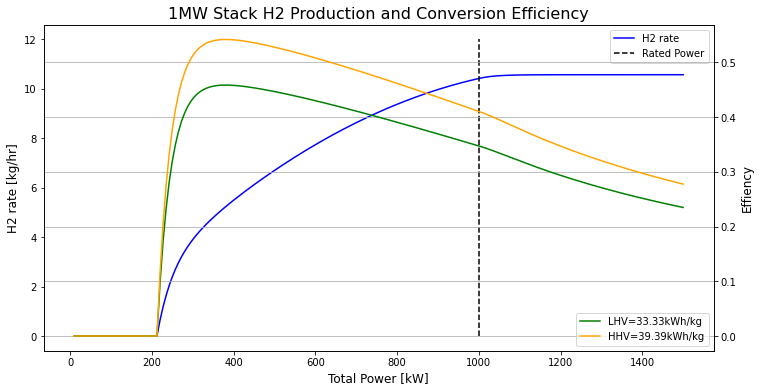

In [49]:
power_test_signal2 = np.linspace(1e4, 1.5e6, 200)

elec_sys5, results_df5 = run_electrolyzer(modeling_input4, power_test_signal2)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('1MW Stack H2 Production and Conversion Efficiency')
ax1.plot(results_df5['power_signal']/1e3, results_df5['kg_rate']*3600, label='H2 rate', color='blue')
ax1.set_xlabel("Total Power [kW]")
ax1.set_ylabel("H2 rate [kg/hr]")
ax1.vlines(x=1000., ymin=0, ymax=12, linestyle='dashed', color='black', label='Rated Power')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(results_df5['power_signal']/1e3, 1000 * 3600 * 33.33 * results_df5['kg_rate'] / results_df5['power_signal'], color='green', label='LHV=33.33kWh/kg')
ax2.plot(results_df5['power_signal']/1e3, 1000 * 3600 * 39.39 * results_df5['kg_rate'] / results_df5['power_signal'], color='orange', label='HHV=39.39kWh/kg')
ax2.set_ylabel("Effiency")
plt.legend(loc='lower right')
plt.grid()

results_df5.tail()

,power_signal,curtailment,kg_rate,stack_1_deg,stack_1_fatigue,stack_1_cycles,stack_1_uptime,stack_1_kg_rate,stack_1_curr_density
195,1.470050e+06,0.470050,0.002937,0.000148,0,1.0,183.0,0.002937,3.018984
196,1.477538e+06,0.477538,0.002937,0.000148,0,1.0,184.0,0.002937,3.018984
197,1.485025e+06,0.485025,0.002937,0.000148,0,1.0,185.0,0.002937,3.018984
198,1.492513e+06,0.492513,0.002937,0.000148,0,1.0,186.0,0.002937,3.018984
199,1.500000e+06,0.500000,0.002937,0.000148,0,1.0,187.0,0.002937,3.018984


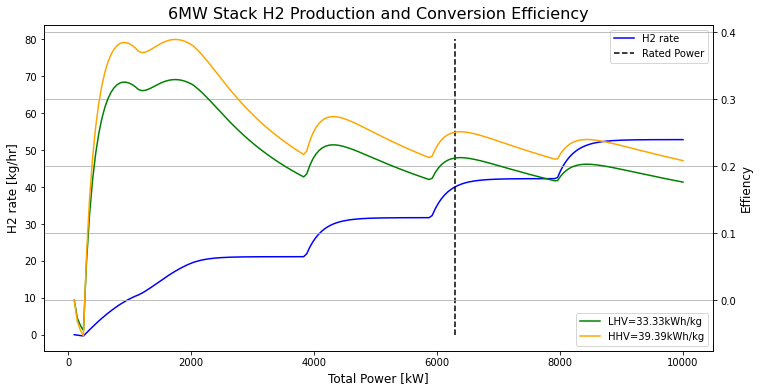

In [50]:
power_test_signal3 = np.linspace(1e5, 10e6, 200)
model_in = load_modeling_yaml(fname_input_modeling)

model_in['electrolyzer']['stack']['stack_rating_kW'] = 1000
model_in['general']['verbose'] = True
model_in["electrolyzer"]["initialize"] = True
model_in["electrolyzer"]["initial_power_kW"] = 6e3
# change the number of stacks
model_in["electrolyzer"]["control"]["n_stacks"] = 6

elec_sys6, results_df6 = run_electrolyzer(modeling_input5, power_test_signal3)

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('6MW Stack H2 Production and Conversion Efficiency')
ax1.plot(results_df6['power_signal']/1e3, results_df6['kg_rate']*3600, label='H2 rate', color='blue')
ax1.set_xlabel("Total Power [kW]")
ax1.set_ylabel("H2 rate [kg/hr]")
ax1.vlines(x=6300., ymin=0, ymax=80, linestyle='dashed', color='black', label='Rated Power')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(results_df6['power_signal']/1e3, 1000 * 3600 * 33.33 * results_df6['kg_rate'] / results_df6['power_signal'], color='green', label='LHV=33.33kWh/kg')
ax2.plot(results_df6['power_signal']/1e3, 1000 * 3600 * 39.39 * results_df6['kg_rate'] / results_df6['power_signal'], color='orange', label='HHV=39.39kWh/kg')
ax2.set_ylabel("Effiency")
plt.legend(loc='lower right')
plt.grid()

results_df5.tail()